# LO - reinforcing functional thinking

- remember the functional idea of trying to find language features that allow a concept to be modeled functionally in a way that, given the problem context, does not compromise complexity or safety 

# LO - iterators

use of iterators over data structure or iteration of data structure in conjunction with currying and objects (this is a very powerful paradigm - why ?

- iterators remove need for actual data : beneficial because
    - less storage   
    - immutable
- as an object via a closure - benefits
    - can be consumed by client objects multiple times
- can be curried - benefits
    - specifics of data to be iterated over can be parameterised

# Assessment notes

- Draw a diagram of the DMC
- define P and R mathematically
- define S mathematically
- define R mathematically
- should non defined states in S be captured by P and R ? Or should P and R assume S is valid ?
- can you keep rolling after you have passed the winning post, or is victory assumed ?
- do you need a max iteration variable ?
- how do I know why it stopped ?
- how much does your code resemble the pseudo code for the "beautiful in its simplicity" algorithm described in (ref goes here) ?
- what features are there in your implementation that are not in the pseudo code ? Do they obscure the purpose of your code ?
- if you were the an author of (ref goes here) would you modify the pseudo code in anyway ? If so how and why? If not, why not ?
- When you were testing your code to see if it works (assuming you did), how did you "know" if it worked or not ? What benchmark did you use to test it ?
- Did you test your implementation of value iteration on any simple test cases ? Could these be made into unit tests ?
- How does the computational effort grow with the number of sides of the die ? What about the target score.
- Can you monitor the rate of convergence ? How do you/could you implement a "configurable" log (configurable meaning easy to change what is logged and when.
- Are there any piglet games that you find $P_{0,0,0}$ analytically ? If so, does your algorithm reproduce this result ?
- How do you know when your method is converged - is this discussed in the paper ?
- 
   

# Notes - 5Rs part of assessment

- How would you assess (THE PAPER) with respect to each of the 5Rs ? Give details of how and why you arrived at each of your assessments.
- How would you assess your replications study with respect to the 5Rs ? How does this compare to your assessment of the original work.
- How is your replication study made available ? Is your code available for use ?
- How does including your code assist with the 5Rs ?
- How does including your code hinder the 5Rs.
- Did you include any pseudo code in your replication study - if so, how does it differ from value iteration.
- Do you consider your code / method to be an implementation of value iteration ? Can you map each part of
- your code to the pseudo code presented in the original article ? If you cannot, why is this the case ?
- Did you actually implement value iteration ? If you think not, why does the original work make a strong connection to this method.
- Did you try contacting the authors of this work ? If so, why - what for ? 

Note - for pier assessment, give some related extension tasks and get groups to use other groups code to solve the task e.g. 
    - Calculate the probability of winning from any given state.
    - Loosing score on more than one value.
    - Using two dice
    - Loosing all of your score on a turn (big pig ?)
This pier assessment should evaluate things such as 
    - accessing code / documentation / report focuses students on re-runability,reproducability)
    - undertaken extension tasks - (focuses students on re-usability)

### Implement a mapping $S \rightarrow 2^{S}$ associating a state $s$ with its set of reachable states $S^{'} \subseteq 2^{S}$.

For piglet, given a valid state $(i,j,k)$ then $(i,j,k) \rightarrow \left\{(i,j,k+1),(i+k,j,0),(i,j,0) \right\}$

In [207]:
from pymonad.tools import curry
from collections import defaultdict
from copy import deepcopy
import functools
import matplotlib.pyplot as plt

### utilities

In [11]:
def compose2(f, g):
    return lambda *a, **kw: f(g(*a, **kw))

def compose(*fs):
    return functools.reduce(compose2, fs)


### Model actions

### Model the probability $P(s^{'}|s,a)$

### Model Reward 

### Implement value iteration

#### methods to test for convergence 

In [13]:
@curry(3)
def bounding_box_convergence(epsilon,V,V_dash) :
    delta = 0.0
    for s in V :
        delta = max(delta,abs(V_dash[s][0] - V[s][0]))
    return True if delta < epsilon else False
        

### Check the value iteration implementation

See [this article](https://artint.info/2e/html2e/ArtInt2e.Ch9.S5.SS2.html#Ch9.F16) for details of the test problems

#### actions

In [5]:
def lifestyle_actions() :
    for action in {"party","relax"} :
        yield action
    pass

#### state transistions

In [6]:
def lifestyle_transitions() :
    def codomain() :
        for s_dash in {"healthy","sick"} :
            yield s_dash 
    for s,S_dash in {("healthy",codomain),("sick",codomain)} :
        yield s,S_dash
    return 

#### state transition probabilities

In [7]:
def lifestyle_transition_probabilities(s,s_dash,action) :
    match (s,s_dash,action) :
        case ("healthy","healthy","party") : return 0.7
        case ("healthy","sick","party") : return 0.3
        case ("healthy","healthy","relax") : return 0.95
        case ("healthy","sick","relax") : return 0.05
        case ("sick","healthy","party") : return 0.1
        case ("sick","sick","party") : return 0.9
        case ("sick","healthy","relax") : return 0.5
        case ("sick","sick","relax") : return 0.5

#### state transition rewards

In [8]:
def lifestyle_transition_rewards(s,s_dash,action) :
    match (s,action) :
        case ("healthy","relax") : return 7.0
        case ("healthy","party") : return 10.0
        case ("sick","relax") : return 0.0
        case ("sick","party") : return 2.0
        

#### solution

In [9]:
lifestyle_value_iteration = value_iteration(lifestyle_transitions,
                                            lifestyle_actions,
                                            lifestyle_transition_probabilities,
                                            lifestyle_transition_rewards,
                                            0.8)
lifestyle_converged = bounding_box_convergence(0.001)

V = defaultdict(lambda : (0.0,None))
V_dash = lifestyle_value_iteration(V)
while not lifestyle_converged(V,V_dash) :
    V = V_dash
    V_dash = lifestyle_value_iteration(V)
V_dash

defaultdict(<function __main__.<lambda>()>,
            {'healthy': (35.711062336395926, 'party'),
             'sick': (23.80630043163403, 'relax')})

### model ${\rm piglet}_{1}$

#### actions

## Remodel the piglet problem - see notebook for details

In [202]:
piglet_actions = lambda :  iter(("roll","stick"))

In [607]:
@curry(2)
def piglet_states(N,d) :
    S = {(i,j,k + l) for i in range(N) 
                     for j in range(N) 
                     for k in range(N - i + 1) 
                     for l in range(d) 
                     if i + k < N}
    def impl() :
        nonlocal S
        for s in S :
            yield s
    return impl

In [4]:
@curry(4)
def piglet_reward(N,s,s_dash,a) :
    i,_,k = s_dash
    return 1.0 if i + k >= N else 0.0

In [752]:

@curry(4)
def piglet_transitions(N,d,a,s) :
    def impl() :
        i,j,k = s
        if a == "roll" :
            for l in range(1,d) :
                if i + k < N :
                    yield i,j,k+l
            if i + k < N :
                yield j,i,0
        if a == "stick" and i + k < N :
            yield (j,i+k,0)
    return impl

In [6]:
# assumes a legitimate transition s -> s_dash
piglet_probability = curry(5,lambda N,d,s,s_dash,a : 1.0 if a == "stick" else 1.0/d)

### new version of value iteration that employs the transition function T

In [7]:
@curry(7)
def value_iteration(S,T,A,P,R,gamma,V) :
    V_dash = deepcopy(V)
    for s in S() :
        V_dash[s] = max([(sum([P(s,s_dash,a)*(R(s,s_dash,a) + gamma*V[s_dash][0]) for s_dash in T(a,s)()]),a) for a in A()])
    return V_dash

### Try solving ${\rm piglet}_{2}^{1}$

In [239]:
@curry(2)
def piglet_adaptation(S,V) :
    V_dash = deepcopy(V)
    for s in S() :
        i,j,k = s
        if k == 0 :
            v,a = V[(j,i+k,0)]
            V_dash[s] = 1.0-v,a        
    return V_dash
    

In [9]:
def delta(V,V_dash) :
    delta = 0.0
    for s in V :
        delta = max(delta,abs(V_dash[s][0] - V[s][0]))
    return delta

14


defaultdict(<function __main__.<lambda>()>,
            {(0, 0, 0): (0.66668701171875, 'roll'), (0, 0, 1): (0, 'stick')})

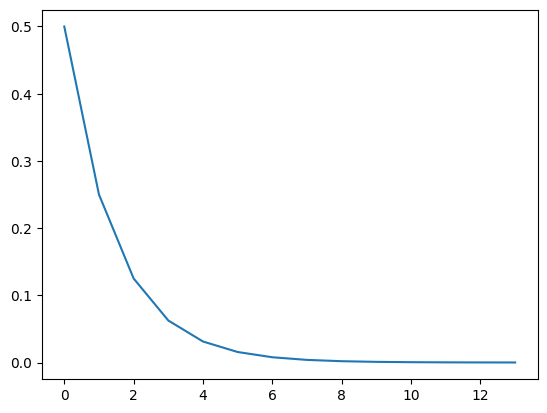

In [753]:
goal = 1
d = 2
gamma = 1.0


A = piglet_actions
P = piglet_probability(goal,d)
T = piglet_transitions(goal,d)
S = piglet_states(goal,d)
R = piglet_reward(goal)

VI  = value_iteration(S,T,A,P,R,gamma)
adapter = piglet_adaptation(S)
pvi = compose(VI,adapter)
V = defaultdict(lambda : (0.0,None))
inside_bounding_box = bounding_box_convergence(0.0001)

V_dash = pvi(V)
its = 0
D = list()
while not inside_bounding_box(V_dash,V) :
    V = V_dash
    V_dash = pvi(V)
    D.append(delta(V,V_dash))
    its += 1
    if its > 100 : break

print(its)
plt.plot(D)
V_dash

In [754]:
for s in S() :
    print("-------------")
    print(s)
    print("--------------")
    for a in A() :
        for t in T(a,s)() :
            print(str(s)," : " + str(a) + " -> " + str(t))

-------------
(0, 0, 0)
--------------
(0, 0, 0)  : roll -> (0, 0, 1)
(0, 0, 0)  : roll -> (0, 0, 0)
(0, 0, 0)  : stick -> (0, 0, 0)
-------------
(0, 0, 1)
--------------


### Try solving ${\rm piglet}_{2}^{2}$

23


defaultdict(<function __main__.<lambda>()>,
            {(5, 9, 0): (0.6164294060383814, 'roll'),
             (1, 18, 0): (0.5874892552651934, 'roll'),
             (7, 8, 0): (0.635294241367708, 'roll'),
             (16, 2, 0): (0.7907260524709845, 'roll'),
             (3, 17, 0): (0.6007379240995054, 'roll'),
             (10, 16, 0): (0.6707200645117359, 'roll'),
             (6, 6, 0): (0.62545081497529, 'roll'),
             (18, 2, 0): (0.8372093023255813, 'roll'),
             (8, 5, 0): (0.6459384424981305, 'roll'),
             (9, 18, 0): (0.6573347049708325, 'roll'),
             (12, 7, 0): (0.7015075510262365, 'roll'),
             (8, 16, 0): (0.6459384424981305, 'roll'),
             (11, 18, 0): (0.685584342673149, 'roll'),
             (18, 17, 0): (0.8372093023255813, 'roll'),
             (17, 14, 0): (0.8150943396226414, 'roll'),
             (13, 4, 0): (0.7181363178065556, 'roll'),
             (16, 6, 0): (0.7907260524709845, 'roll'),
             (19, 14, 0):

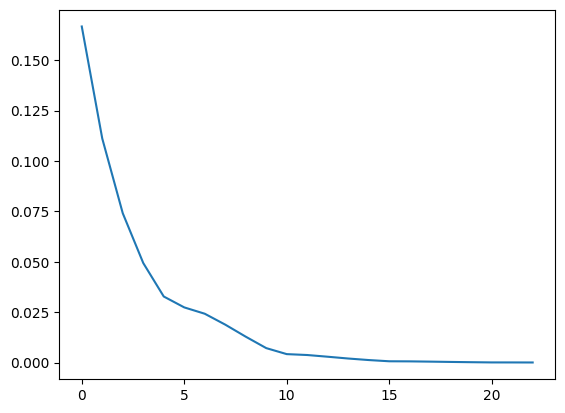

In [771]:
goal = 20
d = 6
gamma = 1.0


A = piglet_actions
P = piglet_probability(goal,d)
T = piglet_transitions(goal,d)
S = piglet_states(goal,d)
R = piglet_reward(goal)

VI  = value_iteration(S,T,A,P,R,gamma)
adapter = piglet_adaptation(S)
pvi = compose(VI,adapter)
V = defaultdict(lambda : (0.0,None))
inside_bounding_box = bounding_box_convergence(0.0001)

V_dash = pvi(V)
its = 0
D = list()
while not inside_bounding_box(V_dash,V) :
    V = V_dash
    V_dash = pvi(V)
    D.append(delta(V,V_dash))
    its += 1
    if its > 200 : break

print(its)
plt.plot(D)
V_dash

In [772]:
V_dash = pvi(V_dash)
print(len(V_dash))
V_dash

6200


defaultdict(<function __main__.<lambda>()>,
            {(5, 9, 0): (0.6164385357283266, 'roll'),
             (1, 18, 0): (0.5874456582739962, 'roll'),
             (7, 8, 0): (0.6352939931299257, 'roll'),
             (16, 2, 0): (0.7907260524710199, 'roll'),
             (3, 17, 0): (0.6007357575145349, 'roll'),
             (10, 16, 0): (0.6707201603595663, 'roll'),
             (6, 6, 0): (0.625454847145948, 'roll'),
             (18, 2, 0): (0.8372093023255813, 'roll'),
             (8, 5, 0): (0.6459372672496622, 'roll'),
             (9, 18, 0): (0.6573343557709079, 'roll'),
             (12, 7, 0): (0.7015075452387036, 'roll'),
             (8, 16, 0): (0.6459372672496622, 'roll'),
             (11, 18, 0): (0.6855843813668521, 'roll'),
             (18, 17, 0): (0.8372093023255813, 'roll'),
             (17, 14, 0): (0.8150943396226413, 'roll'),
             (13, 4, 0): (0.7181363175093373, 'roll'),
             (16, 6, 0): (0.7907260524710199, 'roll'),
             (19, 14, 

In [767]:
for s in S() :
    print("-------------")
    print(s)
    print("--------------")
    for a in A() :
        for t in T(a,s)() :
            print(str(s)," : " + str(a) + " -> " + str(t))

-------------
(0, 0, 4)
--------------
-------------
(0, 0, 3)
--------------
-------------
(0, 0, 0)
--------------
(0, 0, 0)  : roll -> (0, 0, 1)
(0, 0, 0)  : roll -> (0, 0, 2)
(0, 0, 0)  : roll -> (0, 0, 3)
(0, 0, 0)  : roll -> (0, 0, 4)
(0, 0, 0)  : roll -> (0, 0, 5)
(0, 0, 0)  : roll -> (0, 0, 0)
(0, 0, 0)  : stick -> (0, 0, 0)
-------------
(0, 0, 5)
--------------
-------------
(0, 0, 2)
--------------
-------------
(0, 0, 1)
--------------


### tests

In [747]:
for s in piglet_states(1,4)() :
    print(s)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)


In [19]:
A = piglet_actions()

for a in A() :
    print(a)

roll
stick


In [533]:
P = piglet_probability(4,2)
T = piglet_transitions(4,2)
S = piglet_states(4)
R = piglet_reward(4)
for s in S() :
    print("-----")
    print(s) 
    print("-----")
    for a in piglet_actions() :
        print("[" + a + "]")
        for s_dash in T(a,s)() :
            print("    " + str(s_dash) + " -> " + str(P(s,s_dash,a)) + " -> " + str(R(s,s_dash,a)))
    print("-----")

TypeError: 'function' object is not iterable

In [235]:
T = piglet_transitions(1,2)
S = piglet_states(1)
R = piglet_reward(1)
for s in S() :
    print(s) 
    print("-----")
    for a in piglet_actions()() :
        print("[" + a + "]")
        for s_dash in T(a,s)() :
            print("    " + str(s_dash) + " -> " + str(R(s,s_dash,a)))


(0, 0, 0)
-----


TypeError: 'tuple_iterator' object is not callable

In [285]:
T = piglet_transitions(2,2)
S = piglet_states(2)
for a in piglet_actions() :
    for s in S() :
        for t in T(a,s)() :
            print(t)

(0, 0, 1)
(0, 0, 0)
(0, 0, 2)
(0, 0, 0)
(0, 0, 3)
(0, 0, 0)
(0, 1, 1)
(1, 0, 0)
(0, 1, 2)
(1, 0, 0)
(0, 1, 3)
(1, 0, 0)
(1, 0, 1)
(0, 1, 0)
(1, 0, 2)
(0, 1, 0)
(1, 1, 1)
(1, 1, 0)
(1, 1, 2)
(1, 1, 0)
(0, 0, 0)
(0, 1, 0)
(0, 2, 0)
(1, 0, 0)
(1, 1, 0)
(1, 2, 0)
(0, 1, 0)
(0, 2, 0)
(1, 1, 0)
(1, 2, 0)


In [23]:
S = piglet_states(2)
for s in S() :
    print(s)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(1, 0, 0)
(1, 0, 1)
(1, 1, 0)
(1, 1, 1)


In [24]:
S = piglet_states(2)
R = piglet_reward(2)
for s in S() : 
    for s_dash in S() : 
        print(str(s) + " : " + str(s_dash) + " -> " + str(R(s,s_dash,"roll")))

(0, 0, 0) : (0, 0, 0) -> 0.0
(0, 0, 0) : (0, 0, 1) -> 0.0
(0, 0, 0) : (0, 0, 2) -> 1.0
(0, 0, 0) : (0, 1, 0) -> 0.0
(0, 0, 0) : (0, 1, 1) -> 0.0
(0, 0, 0) : (0, 1, 2) -> 1.0
(0, 0, 0) : (1, 0, 0) -> 0.0
(0, 0, 0) : (1, 0, 1) -> 1.0
(0, 0, 0) : (1, 1, 0) -> 0.0
(0, 0, 0) : (1, 1, 1) -> 1.0
(0, 0, 1) : (0, 0, 0) -> 0.0
(0, 0, 1) : (0, 0, 1) -> 0.0
(0, 0, 1) : (0, 0, 2) -> 1.0
(0, 0, 1) : (0, 1, 0) -> 0.0
(0, 0, 1) : (0, 1, 1) -> 0.0
(0, 0, 1) : (0, 1, 2) -> 1.0
(0, 0, 1) : (1, 0, 0) -> 0.0
(0, 0, 1) : (1, 0, 1) -> 1.0
(0, 0, 1) : (1, 1, 0) -> 0.0
(0, 0, 1) : (1, 1, 1) -> 1.0
(0, 0, 2) : (0, 0, 0) -> 0.0
(0, 0, 2) : (0, 0, 1) -> 0.0
(0, 0, 2) : (0, 0, 2) -> 1.0
(0, 0, 2) : (0, 1, 0) -> 0.0
(0, 0, 2) : (0, 1, 1) -> 0.0
(0, 0, 2) : (0, 1, 2) -> 1.0
(0, 0, 2) : (1, 0, 0) -> 0.0
(0, 0, 2) : (1, 0, 1) -> 1.0
(0, 0, 2) : (1, 1, 0) -> 0.0
(0, 0, 2) : (1, 1, 1) -> 1.0
(0, 1, 0) : (0, 0, 0) -> 0.0
(0, 1, 0) : (0, 0, 1) -> 0.0
(0, 1, 0) : (0, 0, 2) -> 1.0
(0, 1, 0) : (0, 1, 0) -> 0.0
(0, 1, 0) : (0

In [25]:
for s in piglet_states(2)() :
    print(s)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(1, 0, 0)
(1, 0, 1)
(1, 1, 0)
(1, 1, 1)


In [111]:
!python -m pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 18.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 17.9 MB/s eta 0:00:0031m18.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.4 MB/s eta 0:00:00
